# Week3 - 복습과제

## 주어진 데이터로 문제를 해결하세요 (1, 2번을 위한 데이터는 카페에 같이 업로드했습니다.)


### 1, 2번 문제에 대한 데이터를 불러오세요.

In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("./Q1_Q2_data.csv",encoding='utf-8-sig') # encoding='utf-8-sig' 은 csv 파일 한글 깨짐 방지입니다. 신경 안쓰셔도 됩니다!
data.head()

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
0,0,서울,전체,2015,10,5841.0
1,1,서울,전용면적 60㎡이하,2015,10,5652.0
2,2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0
3,3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0
4,4,서울,전용면적 102㎡초과,2015,10,5879.0


# 문제1
### 지역명과 분양가격으로만 이루어진 dataframe을 만드세요

In [8]:
data_price = data.loc[:,["지역명","분양가격"]]

In [9]:
data_price.head(5)

,지역명,분양가격
0,서울,5841.0
1,서울,5652.0
2,서울,5882.0
3,서울,5721.0
4,서울,5879.0


# 문제2
### 지역 별 분양가격의 평균가, 최고가를 보여주는 테이블을 만드세요
- ex) 아래 테이블처럼 만드세요.
- 2주차 과제와 마찬가지로 행 인덱스는 신경쓰지 마세요.
- 힌트 : df[df['지역명']=='서울'] <<< 조건에 의해 행을 선택하는 법
  - 지역은 총 17개입니다

|지역명|평균_분양가격|
|-|-|
|서울|7110.753828750435|
|...|...|
|...|...|
|...|...|
|제주|3351.082178907067|

|지역명|최고가_분양가격|
|-|-|
|서울|12728.0|
|...|...|
|...|...|
|...|...|
|제주|5462.0|

In [17]:
dic_price_mean={"지역명":[],"평균_분양가격":[]}
for place in data_price["지역명"].unique():
    price_mean=data_price[data_price["지역명"]==place].mean()
    dic_price_mean["지역명"].append(place)
    dic_price_mean["평균_분양가격"].append(float(price_mean))
data_price_mean = pd.DataFrame(dic_price_mean)
data_price_mean

,지역명,평균_분양가격
0,서울,7110.753829
1,인천,3598.691507
2,경기,4043.176906
3,부산,3656.699983
4,대구,3613.429186
5,광주,3019.865193
6,대전,3086.209798
7,울산,3008.021163
8,세종,2977.695318
9,강원,2430.513801


In [54]:
data_price_max = data_price_mean.rename(columns={"평균_분양가격":"최고가_분양가격"})
for place in data_price_max["지역명"]:
    max_price = data_price.loc[data_price["지역명"]==place,"분양가격"].max()
    data_price_max.loc[data_price_max["지역명"]==place, "최고가_분양가격"]=max_price
data_price_max

,지역명,최고가_분양가격
0,서울,12728.000000
1,인천,5188.000000
2,경기,5670.000000
3,부산,4623.000000
4,대구,5158.000000
5,광주,4881.000000
6,대전,4877.000000
7,울산,3594.000000
8,세종,3931.000000
9,강원,3891.000000


# 문제 3

## 주어진 dataFrame 의 결측값을 해당 열의 평균으로 채워주세요!
### Tip. 아직 part5를 배우지 않았기때문에 원소선택(2주차 자료 )을 통해 채우시면 됩니다! (+ fillna함수를 통해 채우는 것도 가능 ! )  

In [7]:
import seaborn as sns
import pulp
import numpy as np
titanic = sns.load_dataset("titanic")
df = titanic[['age','fare','pclass']][:10]
df # titanic 데이터 불러오기 


OSError: Initializing from file failed

In [2]:
df.fillna(df["age"].mean())

,age,fare,pclass
0,22.000000,7.2500,3
1,38.000000,71.2833,1
2,26.000000,7.9250,3
3,35.000000,53.1000,1
4,35.000000,8.0500,3
5,28.111111,8.4583,3
6,54.000000,51.8625,1
7,2.000000,21.0750,3
8,27.000000,11.1333,3
9,14.000000,30.0708,2


# 문제 4

# (1)

## 주어진 df 에 새로운 열을 추가해주세요.
## 새로운 열의 이름은 'FareE' 고 값은 'Fare'열의 값에서 'Fare'열의 평균을 뺀 값입니다.
### Tip. 함수를 만들고 , apply 함수를 통해 적용해주세요 ! 

In [16]:
def mi(x,y):
    return x-y


In [17]:
df["FareE"]=df["fare"].apply(mi,y=df["fare"].mean())

In [18]:
df

,age,fare,pclass,FareE
0,22.0,7.2500,3,-19.77082
1,38.0,71.2833,1,44.26248
2,26.0,7.9250,3,-19.09582
3,35.0,53.1000,1,26.07918
4,35.0,8.0500,3,-18.97082
5,NaN,8.4583,3,-18.56252
6,54.0,51.8625,1,24.84168
7,2.0,21.0750,3,-5.94582
8,27.0,11.1333,3,-15.88752
9,14.0,30.0708,2,3.04998


# (2)
### 주어진 데이터 프레임 객체의 각 원소에 10을 더해주세요 .
### 매핑함수 pipe 와 lambda함수를 이용해주세요.

In [19]:
df.pipe(lambda x:x+10)

,age,fare,pclass,FareE
0,32.0,17.2500,13,-9.77082
1,48.0,81.2833,11,54.26248
2,36.0,17.9250,13,-9.09582
3,45.0,63.1000,11,36.07918
4,45.0,18.0500,13,-8.97082
5,NaN,18.4583,13,-8.56252
6,64.0,61.8625,11,34.84168
7,12.0,31.0750,13,4.05418
8,37.0,21.1333,13,-5.88752
9,24.0,40.0708,12,13.04998


# 문제 5 
## 주어진 df 에서 'a'열 원소들 '강^호동','유^재석'을 '강호동','유재석'으로 바꿔주세요.
## Tip. 함수매핑과 정규표현식을 이용하시면 됩니다 ! 

In [28]:
import pandas as pd
import re
df = {'a':['강^호동','유^재석'],'b':['나연','지효'],'c':['박나래','장도연']}
df = pd.DataFrame(df)
df

,a,b,c
0,강^호동,나연,박나래
1,유^재석,지효,장도연


In [41]:
#text = re.sub("[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\"…》]", " ", readData)
import re

def string(x):
    a= re.search(r"^\w+",x).group()
    b= re.search(r"\w*$",x).group()
    return a+b

df["a"]=df["a"].apply(string)



In [42]:
df

,a,b,c
0,강호동,나연,박나래
1,유재석,지효,장도연


In [43]:
!pip install tensorflow==1.15.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==1.15.0


In [45]:
conda install tensorflow==1.14.0

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - tensorflow==1.14.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-32
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-32
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-32
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os
os.chdir("C:\\Users\\이혜림\\Desktop\\코알라 유니브\\데이터사이언스\\week4\\data")

In [3]:
df=pd.read_csv("iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


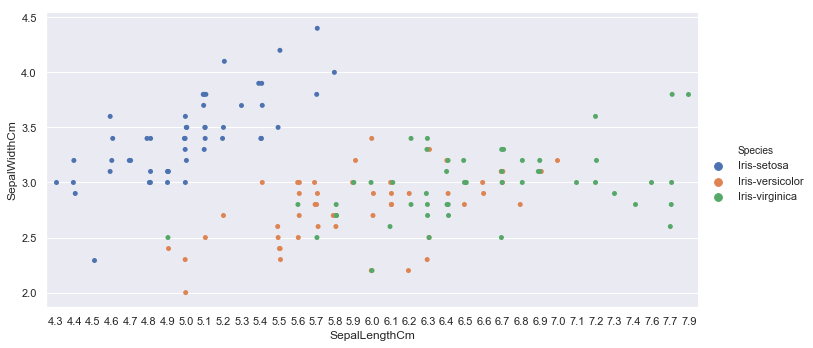

In [4]:
sns.catplot(data=df,x="SepalLengthCm",y="SepalWidthCm",hue="Species",aspect=2)

In [11]:
import pulp

In [12]:
pulp

<module 'pulp' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pulp\\__init__.py'>

In [13]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
!pip install tensorflow==1.15.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==1.15.0
